

# Reducción de dimensionalidad

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Principal Components Analysis (PCA)

Es el método más usado para reducción de dimensions. 

* PCA considera que cada variable de un registro es una coordenada en una dimension. Por ejemplo, un registro de 20 variables, sería como un punto (coordenada) en un espacio de 20 dimensiones. 
* En ese espacio lo que hace PCA es intentar extraer las direcciones de máxima varianza del conjunto de puntos, a estas direcciones les llamamos componentes principales.

__NOTA__: dado que trabajamos con distancias, es bueno estandarizar nuestros datos antes de aplicar este método.

De forma simplificada para hacer un PCA (existen varias versiones) seguimos los siguientes pasos:

1. __Calculamos la matriz de covarianzas__

    Esto lo hacemos con el objetivo identificar relación entre variables, ya que a veces, las variables están altamente correlacionadas y contienen información redundante.

2. __A partir de la matriz de covarianza, obtenemos los eigenvectores y eigenvalores__

    Eso lo hacemos para identificar Los componentes principales, estos son nuevas variables que se construyen como combinaciones lineales de las variables iniciales. Estas combinaciones se realizan de tal manera que las nuevas variables (es decir, los componentes principales) no están correlacionadas y la mayor parte de la información dentro de las variables iniciales se comprime en los primeros componentes. 

__NOTA__: Es importante tener en cuenta que los componentes principales son menos interpretables y no tienen ningún significado real, ya que se construyen como combinaciones lineales de las variables iniciales.

En el siguiente usaremos el dataset `Iris` para obtener una nueva representación de los datos en un espacio de menor dimensión del original.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# importamos iris
iris_dat = datasets.load_iris()

iris = (pd.DataFrame(iris_dat.data)
       .rename(columns = {0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'})
       .assign(species = lambda x: pd.Series(iris_dat.target)
              )
       )

In [ ]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
features = (iris
            .copy()
            .drop(columns=['species']))



El dataset contiene datos sobre tres plantas de iris (iris setosa, iris versicolor, e iris virginica), descritas mediante cuatro atributos:

1. Longitud del sépalo (cm)
2. Ancho del sépalo (cm)
3. Longitud del pétalo (cm)
4. Ancho del pétalos (cm)



Asignamos los datos y las etiquetas a variables diferentes.



Primero vamos a explorar gráficamente los datos. Para ello tomamos los dos primeros atributos.

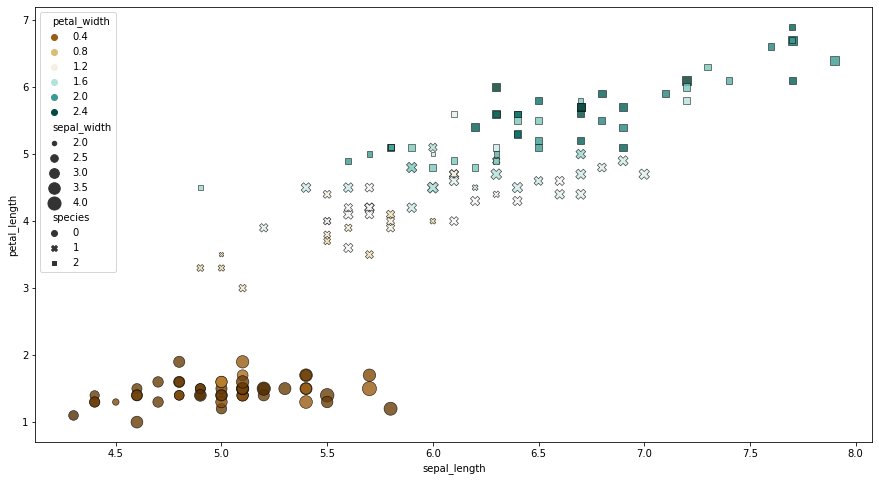

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=iris, 
    x="sepal_length", 
    y="petal_length", 
    # hue="species",
    hue="petal_width",
    palette="BrBG", 
    size="sepal_width",
    sizes=(20, 200),
    alpha = 0.8,
    edgecolor='black',
    style = "species"
)

plt.show()

## PCA en Scikit-learn

Utilizando el datset anterior vamos extraer las tres componentes principales y luego transformar el dataset al nuevo espacio de representación de los atributos.



El proceso se puede descomponer en tres etapas 
1. Crear el objeto PCA
2. Extraemos los componentes principales 
3. Transformamos los datos

In [ ]:
features.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# Importamos decomposition
from sklearn.decomposition import PCA

### `n_components = 3` 

In [ ]:
# Transofrmamos los datos usando 3 componentes principales
pca3 = PCA(n_components=3)

In [ ]:
print(features.head())
features.shape

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


(150, 4)

In [ ]:
# Ajustamos el PCA
features_reduced_3 = pca3.fit_transform(features)

In [ ]:
features_reduced_3

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [ ]:
features_reduced_3.shape

(150, 3)

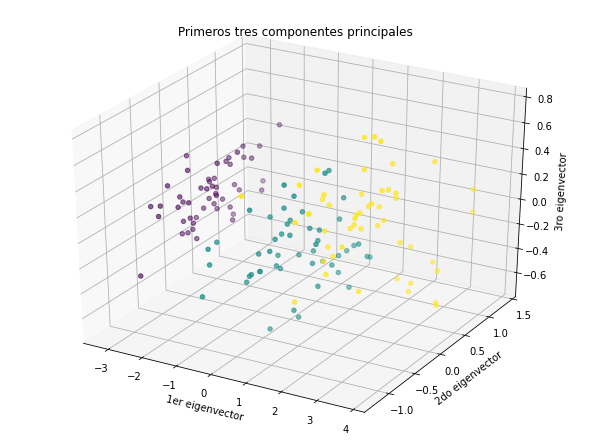

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(features_reduced_3[:, 0], features_reduced_3[:, 1], features_reduced_3[:, 2], c=iris.species)
ax.set_title("Primeros tres componentes principales")
ax.set_xlabel("1er eigenvector")
ax.set_ylabel("2do eigenvector")
ax.set_zlabel("3ro eigenvector")
plt.show()

### `n_components = 2`

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(features)
features_reduced_2 = pca2.transform(features)

In [ ]:
features_reduced_2.shape

(150, 2)

In [ ]:
features_reduced_2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

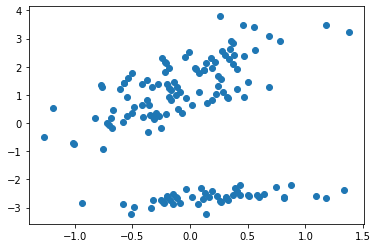

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(features_reduced_2[:, 1], features_reduced_2[:, 0])
plt.show()

In [ ]:
features_ = features.copy()

features_['La Matona'] = [i[0] for i in features_reduced_2]
features_.sort_values('La Matona')

,sepal_length,sepal_width,petal_length,petal_width,La Matona
13,4.3,3.0,1.1,0.1,-3.223804
22,4.6,3.6,1.0,0.2,-3.215939
42,4.4,3.2,1.3,0.2,-2.997407
38,4.4,3.0,1.3,0.2,-2.980502
2,4.7,3.2,1.3,0.2,-2.888991
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,3.230674
105,7.6,3.0,6.6,2.1,3.397039
117,7.7,3.8,6.7,2.2,3.487055
122,7.7,2.8,6.7,2.0,3.499920


## Número Optimo de componentes principales





Para elegir k, hay que tener en cuenta dos conceptos:

- __Error de proyección medio cuadrático__, 

    Es la diferencia entre los datos originales y los reconstruidos a partir del nuevo espacio de características.

\begin{equation}
\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}
\end{equation}

- __Variación total de los datos__ 

    Se considera un buen número k, al valor mínimo que hace que el 99% de la varianza se retenga:

\begin{equation}
\frac{\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}}{\frac{1}{m}\sum_{i=1}^{m}
{\mid{x^{(i)}\mid}^2}} \leq 0.01
\end{equation}

En Scikit-learn podemos obtener el pocentaje de varianza explicada por cada componente principal con el atributo `PCA.explained_variance_ratio_`


Ejemplo:

In [ ]:
features.shape

(150, 4)

In [ ]:
# usamos iris y obtenemos un componente por cada variable original
pca = PCA(n_components=4)
pca.fit(features)

PCA(n_components=4)

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
pca.explained_variance_ratio_.sum()

1.0

In [ ]:
pca.explained_variance_ratio_[0:3].sum()

0.9947878161267247

In [ ]:
pca.explained_variance_ratio_[0:2].sum()

0.977685206318795

In [ ]:
pca.explained_variance_ratio_[0:1].sum()

0.9246187232017271

In [ ]:
print('1 Componente principal ', np.sum(pca.explained_variance_ratio_[0:1]))
print('2 Componente principal ', np.sum(pca.explained_variance_ratio_[0:2]))
print('3 Componente principal ', np.sum(pca.explained_variance_ratio_[0:3]))
print('4 Componente principal ', np.sum(pca.explained_variance_ratio_[:]))

1 Componente principal  0.9246187232017271
2 Componente principal  0.977685206318795
3 Componente principal  0.9947878161267247
4 Componente principal  1.0


In [ ]:
# Esto implica que con 3 componentes principales es suficiente
print('3 Componente principal ', np.sum(pca.explained_variance_ratio_[0:3]))

3 Componente principal  0.9947878161267247


## PCA sobre audio

In [ ]:
%%bash
pip install pydub
apt-get install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
from os import path
from pydub import AudioSegment
from IPython.display import Audio
from scipy.io import wavfile

In [ ]:
# archivo origen
src = "/content/gdrive/MyDrive/Backup/cursos/Cursos/DevF/Course_ready2go/ML_DevF/ML_DevF_08_2022/00_DATA/Maximum_Kouette-Ca_me_dirait_bien.mp3"
# archivo destino
dst = "Ca_me_dirait_bien.wav"

In [ ]:
# convertimos mp3 a wav                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

In [ ]:
samplerate, Ca_me_dirait_bien = wavfile.read('Ca_me_dirait_bien.wav')

In [ ]:
print(type(samplerate))
print(samplerate)

In [ ]:
print(type(Ca_me_dirait_bien))
print(Ca_me_dirait_bien.shape)

Creamos una muestra

In [ ]:
start = samplerate * 5 # empieza en el segundo 5
end = start + samplerate * 20 # 20 segundos de duración

In [ ]:
print(start)
print(end)

In [ ]:
Audio(data=Ca_me_dirait_bien[start:end], rate=samplerate)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
def pca_reduce(signal, n_components, block_size=1024):
    
    # First, zero-pad the signal so that it is divisible by the block_size
    samples = len(signal)
    hanging = block_size - np.mod(samples, block_size)
    padded = np.lib.pad(signal, (0, hanging), 'constant', constant_values=0)
    
    # Reshape the signal to have 1024 dimensions
    reshaped = padded.reshape((len(padded) // block_size, block_size))
    
    # Second, do the actual PCA process
    pca = PCA(n_components=n_components)
    pca.fit(reshaped)
    
    transformed = pca.transform(reshaped)
    reconstructed = pca.inverse_transform(transformed).reshape((len(padded)))
    return pca, transformed, reconstructed

In [ ]:
Ca_me_dirait_bien_left = Ca_me_dirait_bien[:]

In [ ]:
PCA_audio, transformed_audio, reconstructed_audio = pca_reduce(Ca_me_dirait_bien_left, 500, 1024)

In [ ]:
np.sum(PCA_audio.explained_variance_ratio_[:500])

In [ ]:
Audio(data=reconstructed_audio[start:end], rate=samplerate)

In [ ]:
PCA_audio, transformed_audio, reconstructed_audio = pca_reduce(Ca_me_dirait_bien_left, 100, 1024)

In [ ]:
np.sum(PCA_audio.explained_variance_ratio_[:100])

In [ ]:
Audio(data=reconstructed_audio[start:end], rate=samplerate)

In [ ]:
PCA_audio, transformed_audio, reconstructed_audio = pca_reduce(Ca_me_dirait_bien_left, 1024, 1024)

In [ ]:
np.sum(PCA_audio.explained_variance_ratio_[:329])

In [ ]:
PCA_audio, transformed_audio, reconstructed_audio = pca_reduce(Ca_me_dirait_bien_left, 329, 1024)

In [ ]:
Audio(data=reconstructed_audio[start:end], rate=samplerate)

## Ejercicio





Carga los datos de `diabetes` del paquete `sklearn.datasets`, extrae **n** componentes principales y representa los datos transformados en un grafica. Reporta el porcentaje de varianza obtenido.

Información del dataset:

El dataset contiene datos sobre la evolución de la enfermedad en una muestra de pacientes.

- `age`: age in years
- `sex`: sex
- `bmi`: body mass index
- `bp`: average blood pressure
- `s1`: tc, total serum cholesterol
- `s2`: ldl, low-density lipoproteins
- `s3`: hdl, high-density lipoproteins
- `s4`: tch, total cholesterol / HDL
- `s5`: ltg, possibly log of serum triglycerides level
- `s6`: glu, blood sugar level

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
# importamos los datos
diabetes_dat = datasets.load_diabetes()

diabetes = (pd.DataFrame(diabetes_dat.data)
              .rename(columns = {0:'age',1:'sex',2:'bmi',3:'bp',4:'s1',5:'s2',6:'s3',7:'s4',8:'s5',9:'s6'})
              .assign(target = lambda x: pd.Series(diabetes_dat.target)))

diabetes.head()

In [ ]:
# Respuesta